# Is there a link between the presence of women in national parliaments and political instability?

## Import libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

## Women in national parliaments and political instability around the world

### Preliminary tasks to generate the maps

In [2]:
# Read the shapefile and the csv file

map_df = gpd.read_file('/home/roberto/MEGA/Maps/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp')

map_data = pd.read_csv('/home/roberto/MEGA/CodeInPlace/data_maps.csv')

# Merge the two files:

map_df = map_df.merge(map_data, on ="SU_A3") 

# Remove Antarctica

map_df = map_df[map_df.SU_A3!="ATA"]


### The share of women in national parliaments across countries

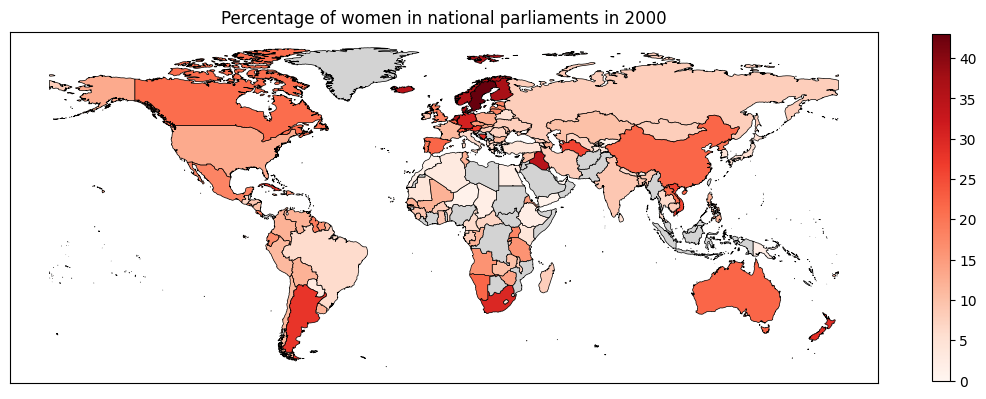

In [16]:
# Plot the map 

fig, ax = plt.subplots(1, 1, figsize=(14, 9))

map_df.plot(column='women_politics', ax=ax,  cmap='Reds', edgecolor='k', linewidth=0.5, legend=True, legend_kwds={
        "shrink":.5}, missing_kwds={"color": "lightgrey"})

# Remove x-labels and y-labels
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

# Set plot title and y-label
ax.set_title('Percentage of women in national parliaments in 2000')


plt.show()

### Political instability across countries

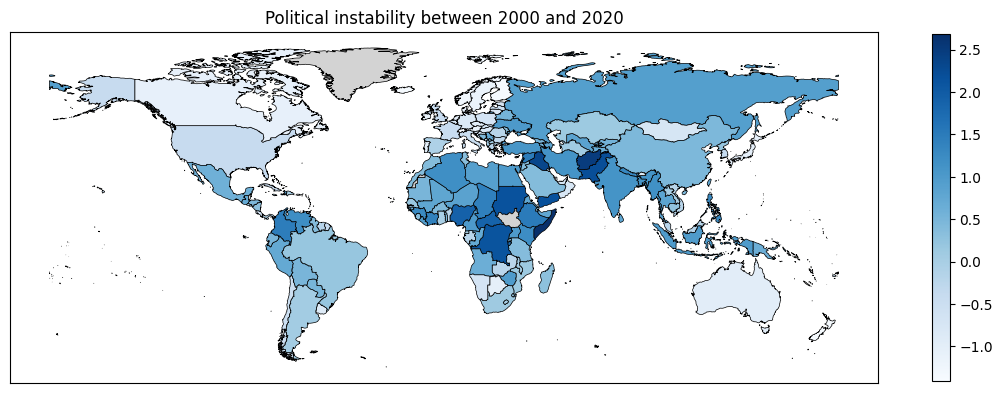

In [3]:
# Plot the map 

fig, ax = plt.subplots(1, 1, figsize=(14, 9))

map_df.plot(column='av_pv',  ax=ax, cmap='Blues', edgecolor='k', linewidth=0.5, legend=True, legend_kwds={
        "shrink":.5}, missing_kwds={"color": "lightgrey"})

# Remove x-labels and y-labels
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

# Set plot title and y-label
ax.set_title('Political instability between 2000 and 2020')


plt.show()

## Import the WDI dataset

In [5]:
# Read the csv file

wdi_data = pd.read_csv('/home/roberto/MEGA/CodeInPlace/data_wdi.csv')

wdi_data.head()

,country,wbcode,Ln_GDPpc,Democracy,Women_Politics,Political_Instability
0,Angola,AGO,7.871099,-1.133058,16,0.630041
1,Albania,ALB,8.093526,0.081893,5,0.063433
2,United Arab Emirates,ARE,10.603250,-1.056755,0,-0.716745
3,Argentina,ARG,9.410739,0.394939,28,0.072477
4,Armenia,ARM,8.174719,-0.148156,3,0.569921


## Preliminary evidence

count    141.000000
mean      12.163121
std        9.292565
min        0.000000
25%        6.000000
50%        9.000000
75%       17.000000
max       43.000000
Name: Women_Politics, dtype: float64


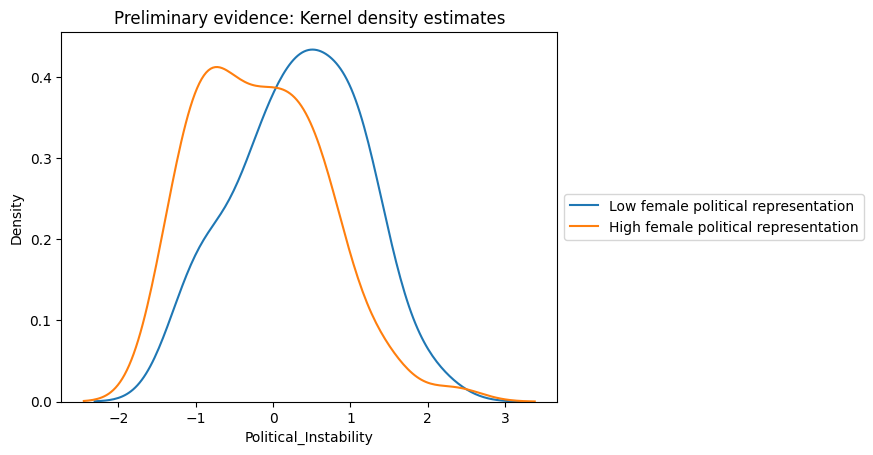

In [14]:

# Summary statistics for Women_Politics
summary_Women_Politics = wdi_data['Women_Politics'].describe()

# Print the summary statistics
print(summary_Women_Politics)

# Generate the two groups:
wdi_data['group'] = 1
wdi_data.loc[wdi_data['Women_Politics'] > 9, 'group'] = 2

# Check the new variable has been succesfully defined
wdi_data.head()

## Subset the data based on the condition group == 1
wdi_subset1 = wdi_data[wdi_data['group'] == 1]['Political_Instability']
# Subset the data based on the condition group == 2
wdi_subset2 = wdi_data[wdi_data['group'] == 2]['Political_Instability']

# Create kernel density plots for each subset
sns.kdeplot(wdi_subset1, label='Low female political representation')
sns.kdeplot(wdi_subset2, label='High female political representation')

# Add legend and title

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Preliminary evidence: Kernel density estimates')

# Show the plot
plt.show()

## Bivariate analysis

### Simple regression model

In [6]:
# Define the dependent variable and independent variable 
y = wdi_data['Political_Instability']
X = wdi_data['Women_Politics']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Political_Instability   R-squared:                       0.152
Model:                               OLS   Adj. R-squared:                  0.146
Method:                    Least Squares   F-statistic:                     24.98
Date:                   Wed, 08 May 2024   Prob (F-statistic):           1.71e-06
Time:                           09:52:43   Log-Likelihood:                -163.95
No. Observations:                    141   AIC:                             331.9
Df Residuals:                        139   BIC:                             337.8
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

### Scatterplot

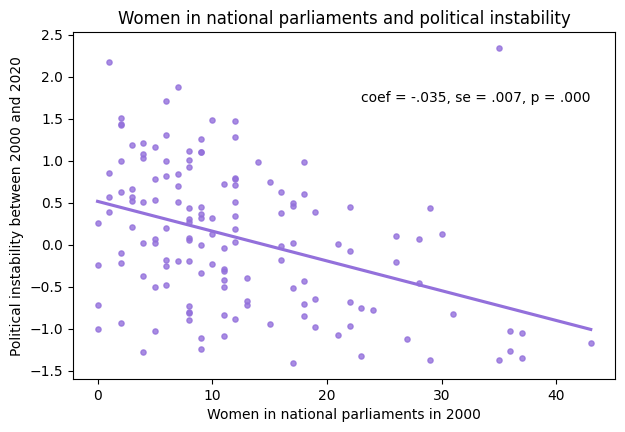

In [21]:
# Plot size

plt.figure(figsize=(7, 4.5))

# Create scatterplot with regression line
sns.regplot(x= wdi_data.Women_Politics, y = wdi_data.Political_Instability,  ci=None, scatter_kws={'s':14, "color": "mediumpurple"}, line_kws={"color": "mediumpurple"} )

# Add labels
plt.xlabel('Women in national parliaments in 2000')
plt.ylabel('Political instability between 2000 and 2020')
plt.title('Women in national parliaments and political instability')

# Add note:

plt.text(23, 1.7, "coef = -.035, se = .007, p = .000")

# Show the plot
plt.show()

## Including additional variables

### Multiple regression model

In [35]:
# Define the dependent variable and independent variables 
y = wdi_data['Political_Instability']
X = wdi_data[['Women_Politics', 'Ln_GDPpc', 'Democracy' ]]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Political_Instability   R-squared:                       0.576
Model:                               OLS   Adj. R-squared:                  0.567
Method:                    Least Squares   F-statistic:                     62.16
Date:                   Tue, 07 May 2024   Prob (F-statistic):           1.97e-25
Time:                           18:44:50   Log-Likelihood:                -115.03
No. Observations:                    141   AIC:                             238.1
Df Residuals:                        137   BIC:                             249.9
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

### Partial regression plot

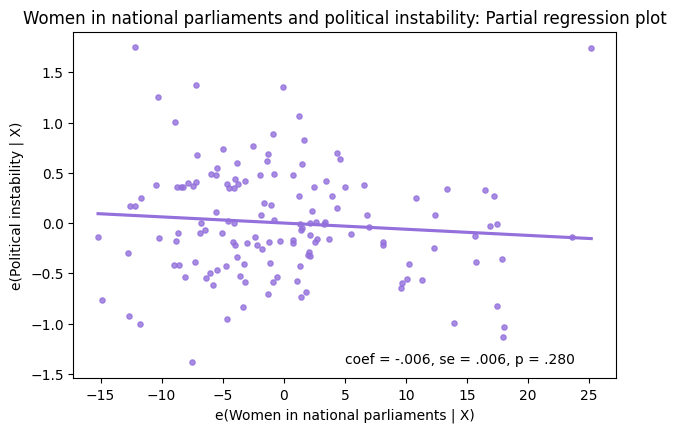

In [22]:
# RESIDUALS Y-AXIS: 

# Define the dependent variable and independent variables 
y = wdi_data['Political_Instability']
X = wdi_data[['Ln_GDPpc', 'Democracy' ]]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model_y = sm.OLS(y, X).fit()

# Obtain residuals
residuals_y = model_y.resid


# RESIDUALS X-AXIS:

# Define the dependent variable and independent variables 
y = wdi_data['Women_Politics']
X = wdi_data[['Ln_GDPpc', 'Democracy' ]]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model_x = sm.OLS(y, X).fit()

# Obtain residuals
residuals_x = model_x.resid


# GENERATE THE PARTIAL REGRESSION PLOT:

plt.figure(figsize=(7, 4.5))

#create scatterplot with regression line
sns.regplot(x= residuals_x, y = residuals_y,  ci=None, scatter_kws={'s':14, "color": "mediumpurple"}, line_kws={"color": "mediumpurple"} )

# Add labels
plt.xlabel('e(Women in national parliaments | X)')
plt.ylabel('e(Political instability | X)')
plt.title('Women in national parliaments and political instability: Partial regression plot')

# Add note:

plt.text(5, -1.4, "coef = -.006, se = .006, p = .280")

# Show the plot
plt.show()